### Importing the needed libraries

In [13]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

### Loading the data, as well as showing it

In [14]:
# Storing the data in variables
titanic_data = pd.read_csv('train.csv')

# Visualising the data
print("Data:-\n")
print(titanic_data)

Data:-

     PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ..

### Checking for the null values and then removing them


In [15]:
# Observing data
print("The null values before editing training data:-\n")
print(titanic_data.isnull().sum())

# Seperator
print("\n----------------------------")
print("----------------------------\n")

# Droping some useless columns
titanic_data = titanic_data.drop('Name', axis = 1)
titanic_data = titanic_data.drop('PassengerId', axis = 1)

# Finally editing and showing data
titanic_data.dropna(inplace = True)
print("The null values after editing training data:-\n")
print(titanic_data.isnull().sum())


The null values before editing training data:-

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

----------------------------
----------------------------

The null values after editing training data:-

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Cabin       0
Embarked    0
dtype: int64


### Encoding the data into numeric data type from alphanumeric data type. As we know that the machine learning model needs data in numeric format so, we need to convert it.

In [16]:
enc = LabelEncoder()

titanic_data['Sex'] = enc.fit_transform(titanic_data['Sex'])
titanic_data['Ticket'] = enc.fit_transform(titanic_data['Ticket'])
titanic_data['Cabin'] = enc.fit_transform(titanic_data['Cabin'])
titanic_data['Embarked'] = enc.fit_transform(titanic_data['Embarked'])


### Looking for correlation

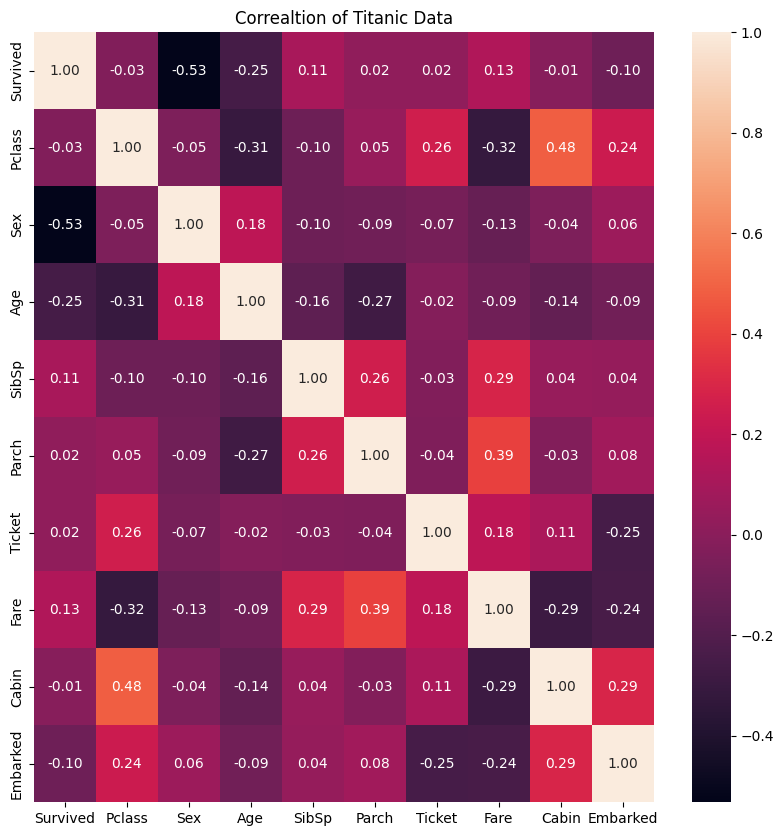

In [23]:
plt.figure(figsize=(10,10))
sns.heatmap(titanic_data.corr(),annot=True,fmt='.2f')
plt.title("Correaltion of Titanic Data")
plt.show()


### Training AI

In [19]:
# Separate the features (X) and the target variable (y)
X = titanic_data.drop('Survived', axis=1)
y = titanic_data['Survived']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the logistic regression model
logreg = LogisticRegression()

# Train the model on the training set
logreg.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = logreg.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)


Accuracy: 0.7297297297297297


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
